<a href="https://colab.research.google.com/github/SKawsar/deep_learning_PyTorch/blob/main/PyTorch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# we would like to generate 20 data points
N = 20

# random data on the x-axis in (-5, +5)
X = np.random.random(N)*10 - 5

# a line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N)

print(X.shape)
print(Y.shape)

(20,)
(20,)


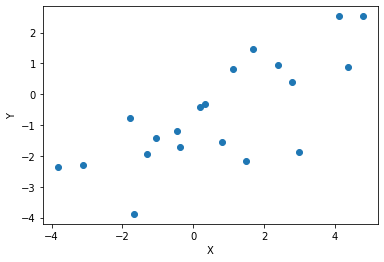

In [22]:
# Plot the data
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### Build a Linear Regression Model using PyTorch

In [23]:
# Create the linear regression model
# nn.Linear(input, output)
model = nn.Linear(1, 1)

In [24]:
# Loss and optimizer
criterion = nn.MSELoss()

# SGD: Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [25]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

print(inputs.shape)
print(targets.shape)

torch.Size([20, 1])
torch.Size([20, 1])


In [26]:
type(inputs)

torch.Tensor

#### Train the model

In [27]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):

  # zero the parameter gradients
  # internally PyTorch accumulates gradients when we call backward()
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())
    
  # Backward and optimize
  # Calculating the gradients
  loss.backward()
  optimizer.step()
    
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 9.9587
Epoch 2/30, Loss: 4.6067
Epoch 3/30, Loss: 3.4569
Epoch 4/30, Loss: 2.9876
Epoch 5/30, Loss: 2.6705
Epoch 6/30, Loss: 2.4190
Epoch 7/30, Loss: 2.2128
Epoch 8/30, Loss: 2.0428
Epoch 9/30, Loss: 1.9024
Epoch 10/30, Loss: 1.7865
Epoch 11/30, Loss: 1.6908
Epoch 12/30, Loss: 1.6117
Epoch 13/30, Loss: 1.5465
Epoch 14/30, Loss: 1.4926
Epoch 15/30, Loss: 1.4481
Epoch 16/30, Loss: 1.4113
Epoch 17/30, Loss: 1.3810
Epoch 18/30, Loss: 1.3559
Epoch 19/30, Loss: 1.3352
Epoch 20/30, Loss: 1.3181
Epoch 21/30, Loss: 1.3040
Epoch 22/30, Loss: 1.2924
Epoch 23/30, Loss: 1.2827
Epoch 24/30, Loss: 1.2748
Epoch 25/30, Loss: 1.2682
Epoch 26/30, Loss: 1.2628
Epoch 27/30, Loss: 1.2583
Epoch 28/30, Loss: 1.2546
Epoch 29/30, Loss: 1.2516
Epoch 30/30, Loss: 1.2491


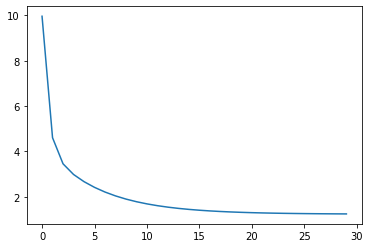

In [28]:
# Plot the loss per iteration
plt.plot(losses);

#### Make Prediction

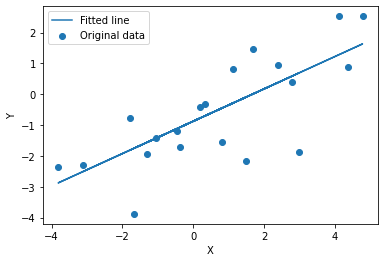

In [29]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [30]:
# Error!
# model(inputs).numpy()

In [31]:
# Another way
with torch.no_grad():
  out = model(inputs).numpy()
print(out)

[[-2.5085979 ]
 [ 0.37599427]
 [-0.70855355]
 [-1.4321737 ]
 [ 0.0093565 ]
 [-1.8078059 ]
 [ 1.6304998 ]
 [ 1.4083831 ]
 [ 1.2791159 ]
 [-0.45319554]
 [-1.7533314 ]
 [-0.09340113]
 [-1.1213524 ]
 [-2.8755834 ]
 [ 0.6827411 ]
 [-0.28915334]
 [-0.7766861 ]
 [-1.5609939 ]
 [-1.0776318 ]
 [ 0.58030957]]


In [32]:
# Important!
# In order to test the efficacy of our model, synthetic data is useful
# Why?
# Because ***we know the answer***
# True values of (w, b) are (0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.5241152]] [-0.8764853]
